### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
shop = pd.read_excel("shopping_behavior.xlsx")
shop

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [3]:
#Info About Data
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
#Shape - No. of rows & columns
shop.shape

(3900, 18)

In [5]:
# List of Columns
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [6]:
#Finding Numerical Columns

num_col=[]
for col in shop.columns:
    if(shop[col].dtypes!='object'):
        num_col.append(col)
print(f"There are total {len(num_col)} numerical columns in dataset\n")
print(num_col)

There are total 5 numerical columns in dataset

['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']


In [7]:
#Finding Categorical Columns

cat_col=[]
for col  in shop.columns:
    if(shop[col].dtypes=='object'):
        cat_col.append(col)
print(f"There are total {len(cat_col)} categorical columns in dataset\n")
print(cat_col)

There are total 13 categorical columns in dataset

['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']


### Data Cleaning & Preprocessing

In [8]:
#Finding Null Values

shop.isnull().mean()*100

Customer ID               0.0
Age                       0.0
Gender                    0.0
Item Purchased            0.0
Category                  0.0
Purchase Amount (USD)     0.0
Location                  0.0
Size                      0.0
Color                     0.0
Season                    0.0
Review Rating             0.0
Subscription Status       0.0
Shipping Type             0.0
Discount Applied          0.0
Promo Code Used           0.0
Previous Purchases        0.0
Payment Method            0.0
Frequency of Purchases    0.0
dtype: float64

## Univariant Analysis

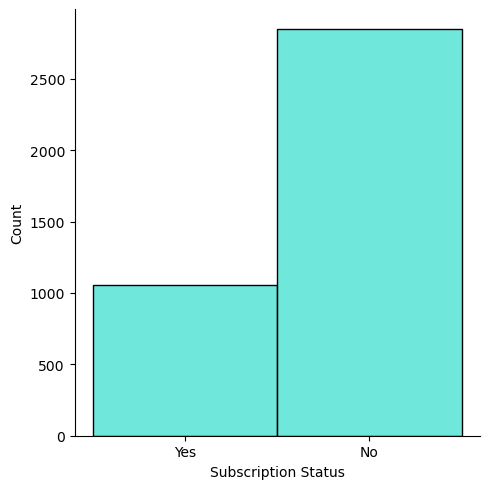

In [9]:
sns.displot(data=shop, 
            x='Subscription Status', 
            kind='hist',
            color="turquoise", 
            edgecolor='black');
plt.show()

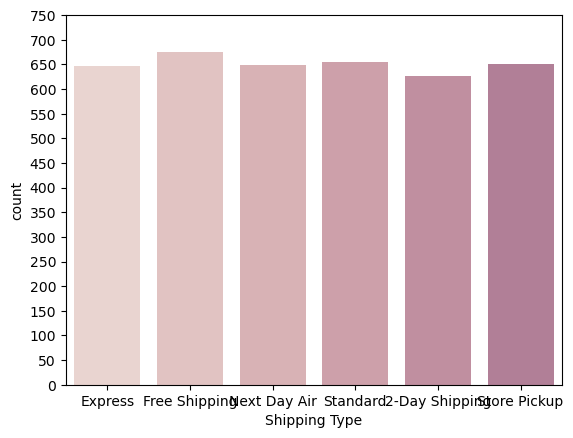

In [10]:
sns.countplot(x='Shipping Type',  
              data=shop,
              palette = sns.cubehelix_palette(len('Shipping Type')))

plt.yticks(range(0,800,50))
plt.show()

## Bivariant Analysis

- `Visual Comparison:` The bar plot allows for a quick visual comparison of review ratings across different categories (represented on the x-axis) through the height of the bars.

- `Decision Support:` This visualization can assist decision-makers in understanding review ratings across different categories and inform strategic decisions based on these ratings.

- `Communicating Insights:` The presentation of review ratings by category aims to convey a clear and comparative understanding of performance or feedback across various segments.

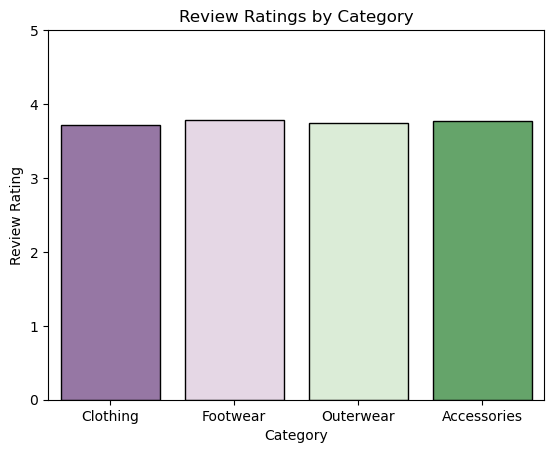

In [11]:
sns.barplot(
    x='Category', 
    y='Review Rating', 
    data=shop,
    palette="PRGn",
    edgecolor='black',
    errorbar=None)

plt.yticks(range(0,6,1))
plt.title('Review Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.show()

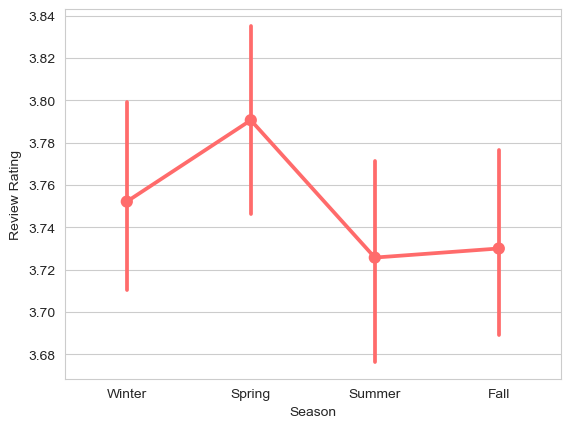

In [12]:
sns.set_style("whitegrid")

sns.pointplot(data=shop, 
            #kind='line', 
            x='Season', 
            y='Review Rating', 
            color='#FF6B6B')
plt.show()

## Trivariant Analysis

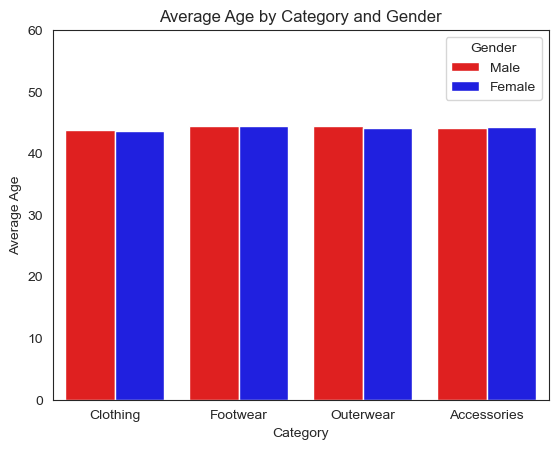

In [13]:
sns.set_style("white")

sns.barplot(data=shop,
            x='Category', 
            y='Age', 
            hue='Gender',
            palette=['r','b'],
            errorbar=None)

plt.title('Average Age by Category and Gender')
plt.xlabel('Category')
plt.ylabel('Average Age')
plt.legend(title='Gender')

plt.yticks(range(0,70,10))
plt.show()

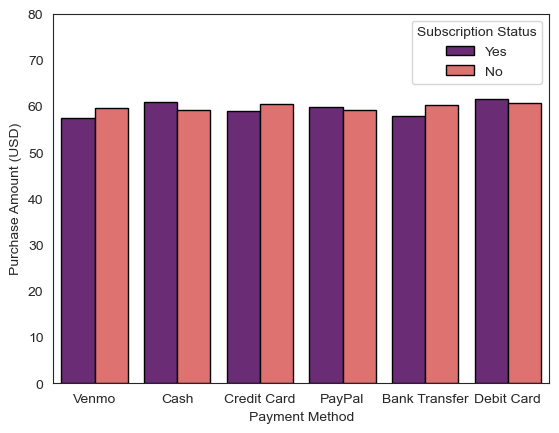

In [14]:
plot = sns.barplot(data=shop,
                   #kind='scatter',
                   x='Payment Method',
                   y='Purchase Amount (USD)',
                   hue='Subscription Status',
                   palette = 'magma',
                   edgecolor='black',
                   errorbar=None)

# Access the underlying FacetGrid and set the x-ticks
plt.yticks(range(0,90,10))  # To increase the ticks, you might not need to change the ticks explicitly

plt.show()

In [16]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Sample data
# data = pd.DataFrame({
#     'Category': ['A', 'A', 'B', 'B', 'A', 'B'],
#     'Status': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes']
# })

# # Create a pivot table with percentages
# pivot_table = data.pivot_table(index='', columns='', aggfunc='', fill_value=0)
# pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100  # Calculate percentages

# # Create a heatmap using Seaborn
# plt.figure(figsize=(8, 6))
# sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".1f", cbar=True)

# plt.title('Pivot Table with Percentage Results')
# plt.show()


In [17]:
shop.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000
